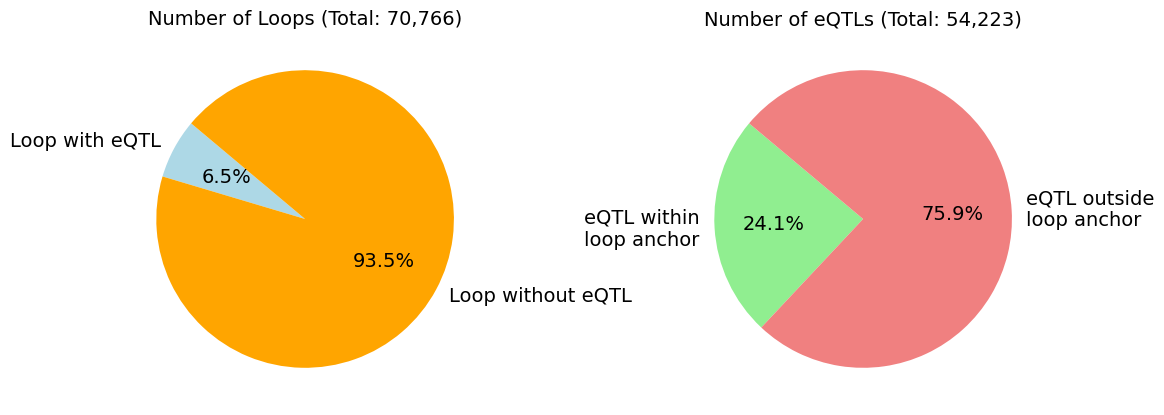

In [ ]:
import matplotlib.pyplot as plt

# 数据
snp_labels = ['Loop with eQTL', 'Loop without eQTL']
snp_sizes = [4598, 66168]

eqtl_labels = ['eQTL within\nloop anchor', 'eQTL outside\nloop anchor']
eqtl_sizes = [13078, 41145]

# 创建画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 设置字体大小
font_size = 14  # 设置字体大小

# 绘制SNP饼图
ax1.pie(snp_sizes, labels=snp_labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange'])
ax1.set_title('Number of Loops (Total: 70,766)', fontsize=font_size)

# 绘制eQTL饼图
ax2.pie(eqtl_sizes, labels=eqtl_labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
ax2.set_title('Number of eQTLs (Total: 54,223)', fontsize=font_size)

# 设置标签字体大小
for label in ax1.texts + ax2.texts:
    label.set_fontsize(font_size)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.5)  # 调整水平间距，数值越大间距越大

# 显示图形
plt.show()


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
annoloop = pd.read_csv('/cluster/home/futing/Project/GBM/eQTL/loop_snp_promoter.bedpe',sep='\t',header=None)
snp=pd.read_csv('/cluster/home/futing/Project/GBM/eQTL/anno/snp_gene_hg38.bed',sep='\t',header=None)
GBM_loop=pd.read_csv('/cluster/home/futing/Project/GBM/HiC/10loop/consensus/cytoscape/GBM/GBM_loop.bed',sep='\t')

In [ ]:
GBM_filloop.head()

,chr1,start1,end1,chr2,start2,end2,loopid,bin1,bin2,E-E,E-P,P-P,other,bin1_info,bin2_info,gene
0,chr1,1940000,1950000,chr1,2040000,2050000,chr1:1940000-1950000_chr1:2040000-2050000,E5,PRKCZ-DT,0,1,0,0,w=5(d=0bpin)|w=6(d=0bpin),"PRKCZ-DT(d=69bp,flank)|PRKCZ(d=410bp,flank)|w=...",PRKCZ-DT
1,chr1,1940000,1950000,chr1,2040000,2050000,chr1:1940000-1950000_chr1:2040000-2050000,E5,PRKCZ,0,1,0,0,w=5(d=0bpin)|w=6(d=0bpin),"PRKCZ-DT(d=69bp,flank)|PRKCZ(d=410bp,flank)|w=...",PRKCZ
3,chr1,1940000,1950000,chr1,2040000,2050000,chr1:1940000-1950000_chr1:2040000-2050000,E6,PRKCZ-DT,0,1,0,0,w=5(d=0bpin)|w=6(d=0bpin),"PRKCZ-DT(d=69bp,flank)|PRKCZ(d=410bp,flank)|w=...",PRKCZ-DT
4,chr1,1940000,1950000,chr1,2040000,2050000,chr1:1940000-1950000_chr1:2040000-2050000,E6,PRKCZ,0,1,0,0,w=5(d=0bpin)|w=6(d=0bpin),"PRKCZ-DT(d=69bp,flank)|PRKCZ(d=410bp,flank)|w=...",PRKCZ
6,chr1,1950000,1960000,chr1,2170000,2180000,chr1:1950000-1960000_chr1:2170000-2180000,E5,PRKCZ-AS1,0,1,0,0,w=5(d=0bpin)|w=6(d=0bpin),"PRKCZ-AS1(d=4388bp,flank)|w=17(d=0bpin)",PRKCZ-AS1


In [ ]:
GBM_filloop.to_csv('/cluster/home/futing/Project/GBM/eQTL/GBM_loopfil.bedpe',sep='\t',header=None,index=False)

In [ ]:
GBM_filloop=GBM_loop.loc[(GBM_loop['E-P']==1) | (GBM_loop['P-P']==1),:]
# GBM_filloop.loc[:,['chr1','start1','end1','chr2','start2','end2']] = \
#     GBM_filloop['loopid'].str.extract(r'(chr[\w]+):(\d+)-(\d+)_([^:]+):(\d+)-(\d+)')
split1 = GBM_filloop['loopid'].str.split('_', expand=True)

# 再把每个片段按 ":" 和 "-" 拆成三列
left = split1[0].str.extract(r'(chr[\w]+):(\d+)-(\d+)')
right = split1[1].str.extract(r'(chr[\w]+):(\d+)-(\d+)')
GBM_filloop[['chr1', 'start1', 'end1']] = left
GBM_filloop[['chr2', 'start2', 'end2']] = right
front_cols = ['chr1', 'start1', 'end1','chr2', 'start2', 'end2']
other_cols = [col for col in GBM_filloop.columns if col not in front_cols]
GBM_filloop = GBM_filloop[front_cols + other_cols]



/tmp/ipykernel_16653/2817752742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GBM_filloop[['chr1', 'start1', 'end1']] = left
/tmp/ipykernel_16653/2817752742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GBM_filloop[['chr1', 'start1', 'end1']] = left
/tmp/ipykernel_16653/2817752742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
annoloop.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,chr1,2430000,2440000,chr1,3620000,3630000,chr1_2430000_2440000_chr1_3620000_3630000,NaN,1.0,NaN,...,rs36110721,MMEL1,5,-0.560404,chr1,3623014,3625014,TPRG1L,5113,+
1,chr1,2430000,2440000,chr1,3620000,3630000,chr1_2430000_2440000_chr1_3620000_3630000,NaN,1.0,NaN,...,rs4364818,TPRG1L,2,-0.339831,chr1,3623014,3625014,TPRG1L,5113,+
2,chr1,8920000,8930000,chr1,9230000,9240000,chr1_8920000_8930000_chr1_9230000_9240000,1.0,NaN,NaN,...,rs4908796,GPR157,5,0.415187,chr1,9232773,9234773,H6PD,36564,+
3,chr1,16000000,16010000,chr1,16180000,16190000,chr1_16000000_16010000_chr1_16180000_16190000,1.0,NaN,NaN,...,rs1739828,MST1P2,1,-0.383556,chr1,16002235,16004235,SRARP,4572,+
4,chr1,16000000,16010000,chr1,16360000,16370000,chr1_16000000_16010000_chr1_16360000_16370000,1.0,NaN,NaN,...,rs1739828,MST1P2,1,-0.383556,chr1,16002235,16004235,SRARP,4572,+


In [ ]:
anno = annoloop.loc[:,[6,]]

In [ ]:
anno = pd.read_csv('/cluster/home/futing/Project/GBM/eQTL/loop_snp_0426.bedpe',sep='\t',header=None)

In [ ]:
anno.columns = ['chr1','start1','end1','chr2','start2','end2','loopid','bin1','bin2','E-E','E-P','P-P','other',
				'bininfo1','bininfo2','gene','chr','start','end','rsid','rsgene','unknown','beta']

In [ ]:
anno.head()

,chr1,start1,end1,chr2,start2,end2,loopid,bin1,bin2,E-E,...,bininfo1,bininfo2,gene,chr,start,end,rsid,rsgene,unknown,beta
0,chr1,2430000,2440000,chr1,3430000,3440000,chr1:2430000-2440000_chr1:3430000-3440000,PLCH2,E13,0,...,"PLCH2(d=4020bp,flank)|w=20(d=0bpin)",w=13(d=0bpin)|w=23(d=0bpin),PLCH2,chr1,2430393,2430393,rs36110721,MMEL1,5,-0.560404
1,chr1,2430000,2440000,chr1,3430000,3440000,chr1:2430000-2440000_chr1:3430000-3440000,PLCH2,E23,0,...,"PLCH2(d=4020bp,flank)|w=20(d=0bpin)",w=13(d=0bpin)|w=23(d=0bpin),PLCH2,chr1,2430393,2430393,rs36110721,MMEL1,5,-0.560404
2,chr1,3450000,3460000,chr1,3620000,3630000,chr1:3450000-3460000_chr1:3620000-3630000,ARHGEF16,ENSG00000238260,0,...,ARHGEF16(d=4664bpin)|w=12(d=0bpin)|w=12(d=0bpin),ENSG00000238260(d=4785bpin)|TPRG1L(d=4985bpin)...,ARHGEF16,chr1,3621937,3621937,rs4364818,TPRG1L,2,-0.339831
3,chr1,3450000,3460000,chr1,3620000,3630000,chr1:3450000-3460000_chr1:3620000-3630000,ARHGEF16,ENSG00000238260,0,...,ARHGEF16(d=4664bpin)|w=12(d=0bpin)|w=12(d=0bpin),ENSG00000238260(d=4785bpin)|TPRG1L(d=4985bpin)...,ENSG00000238260,chr1,3621937,3621937,rs4364818,TPRG1L,2,-0.339831
4,chr1,3450000,3460000,chr1,3620000,3630000,chr1:3450000-3460000_chr1:3620000-3630000,ARHGEF16,TPRG1L,0,...,ARHGEF16(d=4664bpin)|w=12(d=0bpin)|w=12(d=0bpin),ENSG00000238260(d=4785bpin)|TPRG1L(d=4985bpin)...,ARHGEF16,chr1,3621937,3621937,rs4364818,TPRG1L,2,-0.339831


In [ ]:
# df=annoloop.iloc[:,[6,14,15,21]]
# df.columns = ['loopid','rsid','rsgene','gene']
df=anno.loc[:,['loopid','rsid','gene','rsgene']]
loop_gene_map = df.groupby(['loopid', 'rsid'])['gene'].apply(set).reset_index()

# 合并回原表格，加入 gene set
df = df.merge(loop_gene_map, on=['loopid', 'rsid'], suffixes=('', '_set'))

# 检查 rsgene 是否在 gene_set 中
df['overlap'] = df.apply(lambda row: row['rsgene'] in row['gene_set'], axis=1)

# 按 rsid 去重统计有重合的 rsid 数
n_overlap_rsid = df[df['overlap']].drop_duplicates(subset=['rsid']).shape[0]

print("重合的 rsid 个数为：", n_overlap_rsid)
# 统计满足条件的 rsid-rsgene pair 个数
n_overlap_pair = df[df['overlap']].drop_duplicates(subset=['rsid', 'rsgene']).shape[0]

print("重合的 rsid-rsgene pair 个数为：", n_overlap_pair)
# 所有独立 rsid 数
total_rsid = df['rsid'].nunique()

# 所有 rsid–rsgene pair 数（去重）
total_pairs = df.drop_duplicates(subset=['rsid', 'rsgene']).shape[0]
snptotal_pairs = snp.drop_duplicates(subset=[3,4]).shape[0]
# 比例计算
rsid_overlap_ratio = n_overlap_rsid / total_rsid
pair_overlap_ratio = n_overlap_pair / total_pairs
all_overlap_ratio = n_overlap_pair / snptotal_pairs

print(f"rsid 重合比例：{rsid_overlap_ratio:.2%}")
print(f"rsid-rsgene pair 重合比例：{pair_overlap_ratio:.2%}")
print(f"所有rsid-rsgene pair 重合比例：{all_overlap_ratio:.2%}")


重合的 rsid 个数为： 940
重合的 rsid-rsgene pair 个数为： 940
rsid 重合比例：20.47%
rsid-rsgene pair 重合比例：19.25%
所有rsid-rsgene pair 重合比例：1.62%


In [ ]:
anno['rsid'].nunique()

4593

In [ ]:
annoSNP = anno.loc[:,['loopid','rsid','']]

In [ ]:
940/4593

0.20465926409753973

In [ ]:
snp=pd.read_csv('/cluster/home/futing/Project/GBM/eQTL/anno/snp_gene_hg38.bed',sep='\t',header=None)

In [ ]:
snp.head()

,0,1,2,3,4,5,6
0,chr5,97014384,97014384,rs27290,ERAP2,4,1.170589
1,chr4,39452701,39452701,rs6531717,RPL9,3,-1.023211
2,chr4,39453758,39453758,rs2249563,RPL9,3,-1.023211
3,chr4,39455533,39455533,rs2687955,RPL9,3,-1.023211
4,chr4,39455810,39455810,rs2687956,RPL9,3,-1.023211


In [ ]:
total_pairs = snp.drop_duplicates(subset=[3,4]).shape[0]

In [ ]:
n_overlap_pair / total_pairs

0.022877732570167574